<a href="https://colab.research.google.com/github/prideven/DataMining/blob/main/DataCleaning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Data Cleaning`**

Performed data cleaning to predict the cancellation by the guest. 

Import Useful Functions and libraries

In [41]:
# importing necessary libraries
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv
import gdown
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Loading dataset with pandas
#to load file from google drive
url='https://drive.google.com/uc?id=1G-v_gn4kyrPti3snkI-TovKyAc3TvaAB'
output= "data.csv"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1G-v_gn4kyrPti3snkI-TovKyAc3TvaAB
To: /content/data.csv
16.9MB [00:00, 118MB/s] 


'data.csv'

In [4]:
#loading the csv file into pandas dataframe
df=pd.read_csv("data.csv")

In [ ]:
# Display dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#display only few elements
df.head

<bound method NDFrame.head of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [ ]:
#to display the total number of rows and columns present in the data
df.shape

(119390, 32)

The dimension of our dataset is 119390 rows and 32 columns.
We can now perform cleaning activity to extract some information like the number of non-null values in every column and their datatypes

In [ ]:
#to display the valid information present in the dataset
df.info

<bound method DataFrame.info of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...      

In [47]:
import matplotlib.ticker as mtick

def get_count(series, limit=None):
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    x = series.index
    y = series/series.sum()*100
    return x.values,y.values

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=figsize)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    if x_label != None:
        ax.set_xlabel(x_label)
    if y_label != None:
        ax.set_ylabel(y_label)
    if title != None:
        ax.set_title(title)
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


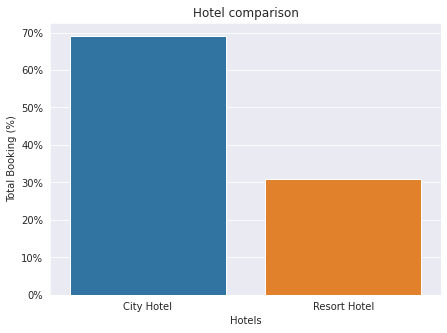

In [49]:
x,y = get_count(df['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

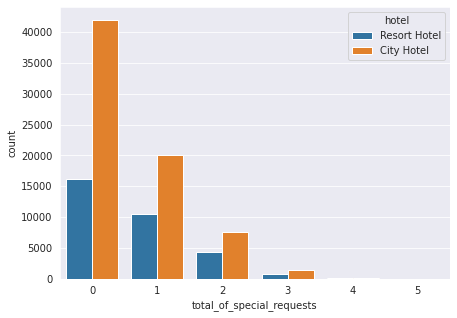

In [51]:
plt.subplots(figsize=(7,5))
sns.countplot(x='total_of_special_requests', hue='hotel',  data=df);

In [ ]:
# find the total count of null values in each columns. 
np.sum(df.isnull())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see from above dataset, it contains 7 columns with null values. The null values need to be either filled with a default values or it can omitted with respect to column elimination or row elimination. 

**REMOVING UNWANTED DATA**

Usually, if more than 70% of values in a column are missing and there is no way to fill in the missing values, then the column can be dropped completely from the dataset.

**i)REMOVE Null VALUES**

Usually, if more than 70% of values in a column are missing and there is no way to fill in the missing values, then the column can be dropped completely from the dataset.

In [5]:
for column in df.columns:
  if np.sum(df[column].isnull())>(df.shape[0]*0.7):
    df.drop(columns=column,inplace=True,axis=1)
print(df.shape)

(119390, 31)


The company column which contained more than 1 lakh missing values is removed. Hence, the total count of columns is 31 at this point.

**ii)REMOVE Redudant data**

The “arrival_date_week_number” column is of no use as we already have 3 columns of the year, month, and the day giving us the date of arrival. Also as we have created a new column showing the date, we no more need the 3 individual columns. Hence let us remove these column

In [6]:
df=df.drop(columns=["arrival_date_week_number","arrival_date_day_of_month","arrival_date_year","arrival_date_month"])



In [7]:
print(df.shape)

(119390, 27)


After removing 4 more columns, the total count of columns is 28 at this point.

**iii) Removing unwanted rows**

Depending upon what values we are predicting, we can either remove the entire column or remove the row having empty values.
Now below step shows to remove all rows having a missing value in the agent col

In [8]:
df.dropna(subset=["agent"],inplace=True)
df.shape

(103050, 27)

We can see the number of rows has consideralbly decreased, using the dropna function on our dataframe. 

**Filling the missing values of columns**

As mean can be of float datatype,we can take the lowest nearest integer using the floor method

In [9]:
df['children'].fillna(value=df["children"].mean(),inplace=True)
df["children"]=df["children"].apply(np.floor)
totalNull=np.sum(df.children.isnull())
print(totalNull)
dataframe=df

0


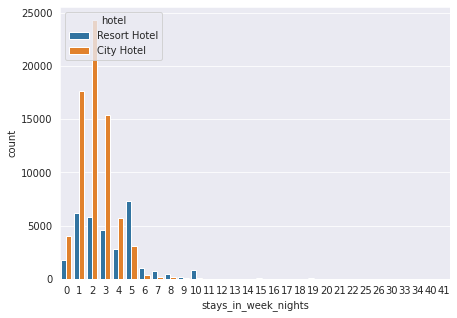

In [45]:
plt.subplots(figsize=(7,5))
sns.countplot(x='stays_in_week_nights', hue='hotel',  data=df);

In [10]:
df.head

<bound method NDFrame.head of                hotel  is_canceled  ...  reservation_status  reservation_status_date
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
5       Resort Hotel            0  ...           Check-Out               2015-07-03
7       Resort Hotel            0  ...           Check-Out               2015-07-03
8       Resort Hotel            1  ...            Canceled               2015-05-06
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

**Dropping off less related data** 

In [11]:
df_subset = df.drop([
                           "hotel","meal", 'assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled','reservation_status','customer_type','deposit_type','distribution_channel',"market_segment","country"],axis=1)

print the values after dropping the data



In [12]:
df_subset

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
3,0,13,0,1,1,0.0,0,0,0,304.0,0,75.00,0,0
4,0,14,0,2,2,0.0,0,0,0,240.0,0,98.00,0,1
5,0,14,0,2,2,0.0,0,0,0,240.0,0,98.00,0,1
7,0,9,0,2,2,0.0,0,0,0,303.0,0,103.00,0,1
8,1,85,0,3,2,0.0,0,0,0,240.0,0,82.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0.0,0,0,0,394.0,0,96.14,0,0
119386,0,102,2,5,3,0.0,0,0,0,9.0,0,225.43,0,2
119387,0,34,2,5,2,0.0,0,0,0,9.0,0,157.71,0,4
119388,0,109,2,5,2,0.0,0,0,0,89.0,0,104.40,0,0


**Train Test Split**


Splitting the dataset into train and test. The default size of the split ratio is 3:1 is performed. 

In [ ]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = data_split(df_subset, 'is_canceled')

**Model using Decision Tree**

There are many ways to predict our model and i have used decision tree to predict the model.


In [ ]:
def train(x_train, y_train):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    return clf
clf = train(x_train, y_train)

**Evaluating the Machine learning Model**

To evaluate our model we need to check the training and testing accuracy

In [ ]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of model: {train_score}')
    print(f'Test Accuracy of model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of model: 0.9882127654068601
Test Accuracy of model is: 0.9882127654068601


**Random value Prediction**

Picking a random sample  to make the prediction and compare it with the actual values

In [ ]:
## Getting Prediciton of 100th record of x_train
prediction = clf.predict(x_train.iloc[100].values.reshape(1,-1))

## Actual Value of 100th record of x_train from y_train
actual_value = y_train.iloc[100]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 0
Actual Value		: 0


Our model correctly predicted that the guest will not cancel the booking.

**COCLUSION:**

Made the predictive model using the Decision Tree to predict whether the guest will cancel the booking or not and achieved 98% accuracy.